**2016-11-29**

In this notebook, some simulation data of ions and electrons are Fourier transformed to get an impression of the relative signal strength. This was an idea Thomas came up with today.

Input data is from a simulation run by Marco. He ran the simulation with these parameters:
* Pitch = 200nm
* Depth = 100nm
* sigma_x = sigma_y = 50nm (S-Shape density gradient)

The task is to Fourier transform:
* electron densities, summed over x, for all time steps
* ion densities, summed over x, for all time steps
* a step-like artificial grating of the same dimensions, summed over x
* a softened grating of the same dimensions, summed oveer x - **I'm not sure if Thomas wants me to produce this one artificially, too**

All those FTs are to be normed to 1. And, maybe, to something with physical meaning, too (electrons/ions). I should probably slice the data to get periodic boundary conditions more or less - if it's possible to do so and still have a power of 2 number of bins.

**2016-11-30**

rausschreiben: Höhe des 1., 2., 5. Maximums

* Rechteckgrating, normiert auf Zeitschritt 0
* alle Zeitschritte
* Rechteckgrating + alle Zeitschritte, normiert auf dieselbe Modulationstiefe

* Elektronen
* Ionen

## Import stuff

In [30]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
package_path = '/home/mz6084/fowgas/packages/'
import sys
sys.path.append(package_path)
from auxiliary import *

## Filenames

In [32]:
# datasets 029
sets029_dir = '/home/mz6084/mz6084_2016_LN04_support/marcos_029/'
sets029 = []

sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_01.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_02.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_03.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_04.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_05.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_06.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_07.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_08.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_09.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_10.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_11.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_12.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_13.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_14.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_15.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_16.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_17.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_18.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_19.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_20.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_21.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_22.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_23.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_24.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_25.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_26.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_27.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_28.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_29.txt'})
sets029.append({'slc' : (14, 462), 'fn' : sets029_dir+'ions_30.txt'})

## Function definitions

In [33]:
def read_and_extract(fn):
    raw       = np.loadtxt(fn)
    y         = raw[:, 0]
    yres      = len(y)
    ymin      = np.min(y)
    ymax      = np.max(y)
    sample    = raw[:, 1]
    return raw, y, yres, ymin, ymax, sample

def put_in_dict(d, raw, y, yres, ymin, ymax, sample):
    d['raw']  = raw
    d['y']    = y
    d['yres'] = yres
    d['ymin'] = ymin
    d['ymax'] = ymax
    d['g']    = sample
    return d

def freq_and_fft(g, y, yres):
    f      = fft.fftshift(fft.fftfreq(yres, y[1]-y[0]))
    G      = fft.fftshift(fft.fft(g))
    return f, G

def put_fft_in_dict(d, f, G):
    d['f'] = f
    d['G'] = G
    return d

def adjust_to_model(g, model):
    g_min = np.min(g)
    g_max = np.max(g)
    model_min = np.min(model)
    model_max = np.max(model)
    gg = (g-g_min)/(g_max-g_min)*(model_max-model_min)+model_min
    return gg

def get_max_vals(G, n, dif):
    return [G[n//2 + 0*dif],\
            G[n//2 + 1*dif],\
            G[n//2 + 2*dif],\
            G[n//2 + 3*dif],\
            G[n//2 + 4*dif],\
            G[n//2 + 5*dif]]

## Read and extract data from files

In [34]:
datasets    = sets029
modelset_fn = sets029_dir+'ions_01.txt'
model       = read_and_extract(modelset_fn)[5]

n = len(datasets)

for i in range(n):
    # Unpack variables
    d      = datasets[i]
    fn     = d['fn']
    slc    = d['slc']
    
    # Read and extract data from file
    raw, y, yres, ymin, ymax, sample\
           = read_and_extract(fn)
    y      = y[     slc[0]:slc[1]]
    sample = sample[slc[0]:slc[1]]
    yres   = len(y)
    ymin   = np.min(y)
    ymax   = np.max(y)
    d      = put_in_dict(d, raw, y, yres, ymin, ymax, sample)
    
    # Calculate adjusted sample
    g_adj  = adjust_to_model(sample, model)
    d['g_adj'] = g_adj
    
    # Calculate FFTs
    g      = d['g']
    f, G   = freq_and_fft(g, y, yres)
    put_fft_in_dict(d, f, G)
    
    f, G_adj = freq_and_fft(g_adj, y, yres)
    d['G_adj'] = G_adj

## Synthesize grating with perfect edges to resemble cold electrons

In [35]:
# Cold electron density sample, direct space domain
ref_dataset = datasets[0]
g = ref_dataset['g']
y = ref_dataset['y']

# Extract lower and upper step density values - like this:
#
# h1 ->      +-----
#            |
# h0 -> -----+
#
h0          = np.min(g)
h1          = np.max(g)

# Create grating function with perfect edges that resembles cold electron density
from grating2 import *
sigma       = 0.0001
mu          = 0.
fct_edge    = make_erf_edge(sigma, mu)

pitch       = 200.
fsize       = 100.
fct_box     = make_box(pitch, fsize, fct_edge)

offset      = 100.
fct_grating = lambda y : h0 + (h1-h0) * make_periodical(pitch, fct_box, offset)(y)

# Sample perfect edge grating
g_syn       = fct_grating(y)

# Put direct space data into dataset
syn_dataset = {'fn' : 'synthetic'}

y_syn       = y
yres_syn    = ref_dataset['yres']
ymin_syn    = ref_dataset['ymin']
ymax_syn    = ref_dataset['ymax']

syn_dataset = put_in_dict(syn_dataset, None, y_syn, yres_syn, ymin_syn, ymax_syn, g_syn)

# Calculate adjusted sample
g_adj       = adjust_to_model(g_syn, model)
syn_dataset['g_adj']\
            = g_adj

# Calc FFT and put into dataset
f_syn, G_syn \
            = freq_and_fft(g_syn, y_syn, yres_syn)
syn_dataset = put_fft_in_dict(syn_dataset, f_syn, G_syn)

f, G_adj    = freq_and_fft(g_adj, y_syn, yres_syn)
syn_dataset['G_adj']\
            = G_adj

## Plot and print maxima of absolutes in frequency

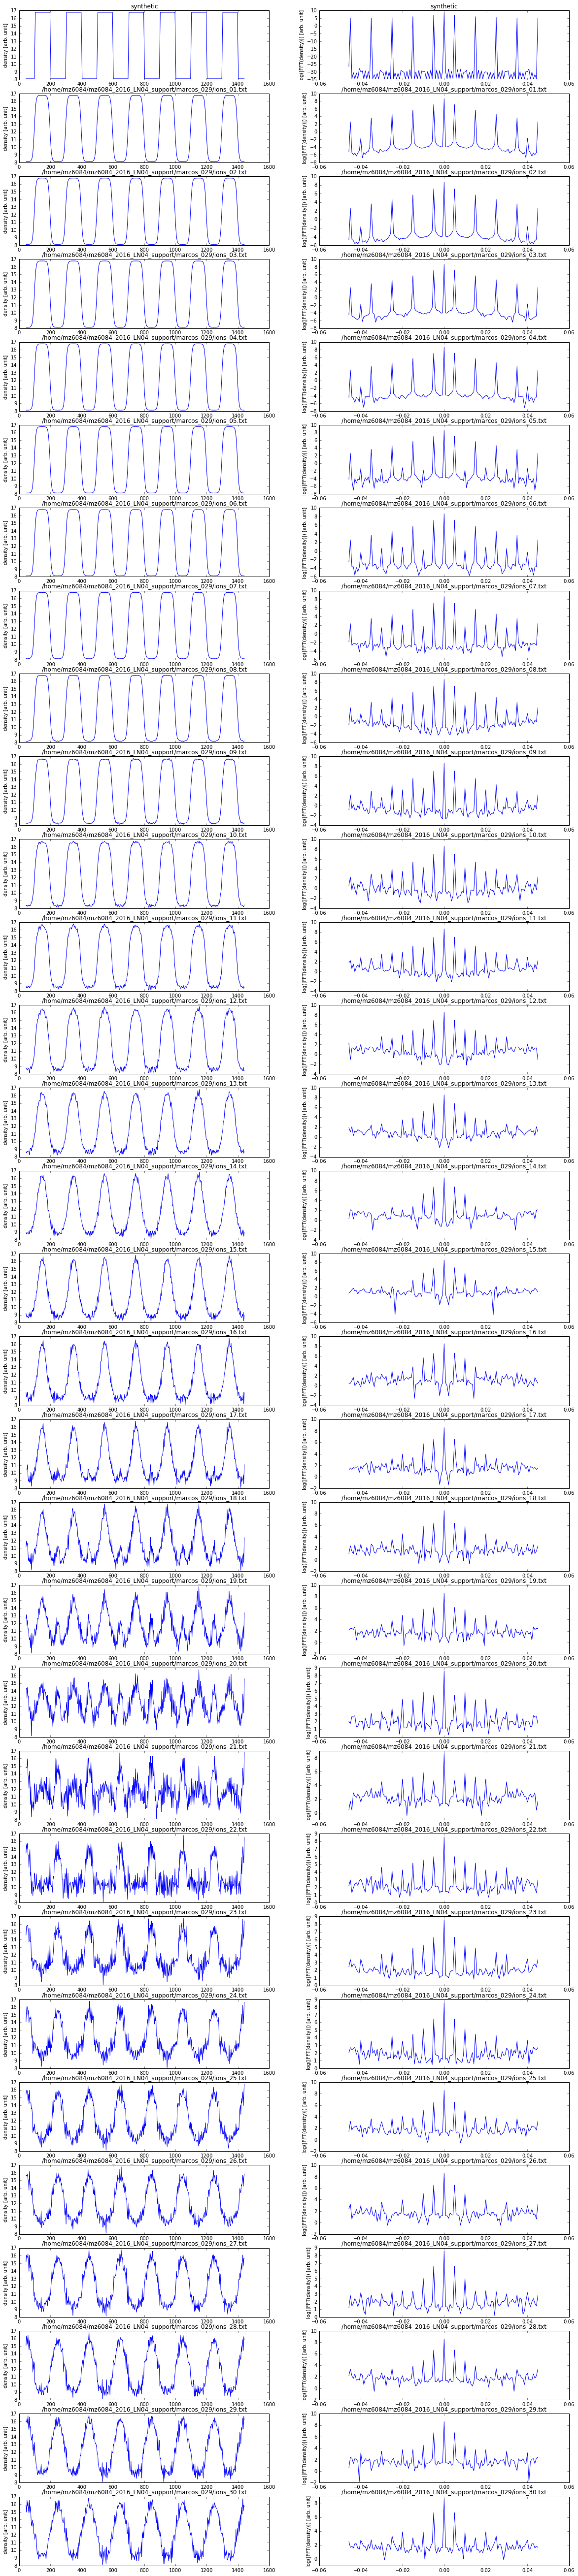

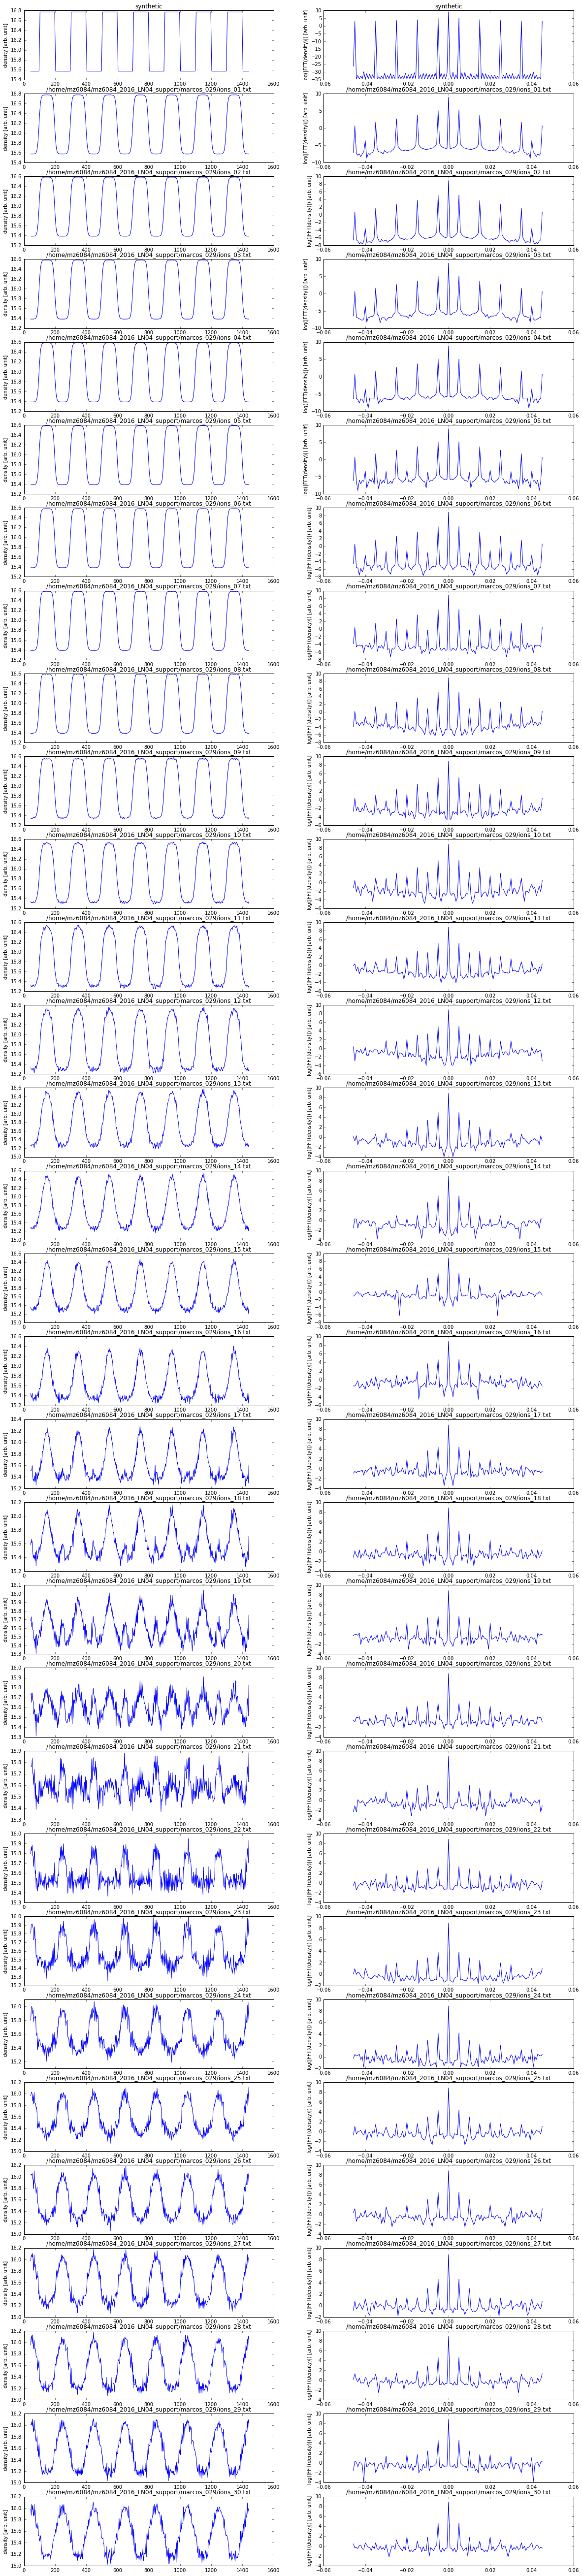

In [36]:
datasets = [syn_dataset,] + datasets
n        = len(datasets)

max_str_normalized \
         = ""
fig_normalized \
         = plt.figure(figsize=(20, n*3))
subs_normalized \
         = []

max_str_unnormalized \
         = ""
fig_unnormalized \
         = plt.figure(figsize=(20, n*3))
subs_unnormalized \
         = []

for i in range(n):
    # Unpack variables
    d      = datasets[i]
    fn     = d['fn']
    y      = d['y']
    yres   = d['yres']

    f      = d['f']

    for mode in ['normalized', 'unnormalized']:
        if mode is 'normalized':
            g    = d['g_adj']
            G    = d['G_adj']
            fig  = fig_normalized
            subs = subs_normalized
            max_str\
                 = max_str_normalized
        else:
            g    = d['g']
            G    = d['G']
            fig  = fig_unnormalized
            subs = subs_unnormalized
            max_str\
                 = max_str_unnormalized
        
        # Get vals at maximum positions
        max_vals = get_max_vals(G, yres, 7)
        max_str += '{}, {}, {}, {}, {}, {}\n'.format(fn, np.abs(max_vals[0]), np.abs(max_vals[1]), np.abs(max_vals[2]), np.abs(max_vals[3]), np.abs(max_vals[4]), np.abs(max_vals[5]))
        
        # Plot...
        #   ...real space
        subs.append(fig.add_subplot(n, 2, 2*i+1))
        sub1   = subs[-1]
        sub1.set_title(fn)
        sub1.set_ylabel('density [arb. unit]')
        sub1.plot(y, g)
        
        #   ...Fourier space
        nids = 128
        ids = ((yres-nids)//2, (yres+nids)//2)
        
        subs.append(fig.add_subplot(n, 2, 2*i+2))
        sub2 = subs[-1]
        sub2.set_title(fn)
        sub2.set_ylabel('log(|FFT(density)|) [arb. unit]')
        #plot_complex(f[ids[0]:ids[1]], G[ids[0]:ids[1]], axes=sub)
        sub2.plot(f[ids[0]:ids[1]], np.log(np.abs(G[ids[0]:ids[1]]+1.e-15)))
        
        if mode is 'normalized':
            max_str_normalized\
                 = max_str
        else:
            max_str_unnormalized\
                 = max_str


In [37]:
fig_unnormalized.savefig('unnormalized' + '.png')
fig_unnormalized.savefig('unnormalized' + '.svg')
max_str_unnormalized = 'fn, 0. max, 1. max, 2. max, 3. max, 4. max, 5.max\n' + max_str_unnormalized
with open("unnormalized_maxima.txt", "w") as text_file:
    text_file.write(max_str_unnormalized)

fig_normalized.savefig(  'normalized'   + '.png')
fig_normalized.savefig(  'normalized'   + '.svg')
max_str_normalized = 'fn, 0. max, 1. max, 2. max, 3. max, 4. max, 5.max\n' + max_str_normalized
with open("normalized_maxima.txt", "w") as text_file:
    text_file.write(max_str_normalized)

Summierte Dichten
-----

* Anzahl der Perioden im Bild: 7
* Breite: 1396.875 -> ca. 1400 (unit is nm)
* Periodenlänge, ca.: 200 (unit is nm)

* 1. Frequenzmaximum: 1/(200 nm) = 0.005 1/nm
* 2. Frequenzmaximum: 2/(200 nm) = 0.01  1/nm
* ...
* df entspricht der Breite eines Frequenzpixels und ist ca. (0.32 * 1/nm) / 448
* der Abstand zweier Frequenzmaxima ist 0.005 * 1/nm / df = 7 Pixel


In [38]:
f = summedsets[0]['f']
G = summedsets[0]['G']
print(np.max(f) - np.min(f))

n = len(f)
print(n)

# The size of 1 px equals df and is:
print(0.32/448)

# The number of pixels from one max to the next is:
print(0.005/0.32*448)

print(np.abs(G[n//2]), np.abs(G[n//2+7]), np.abs(G[n//2+14]))

2

KeyError: 'f'

In [ ]:
xres = 128
xmin = 0.
xmax = 10.
x    = np.linspace(xmin, xmax, xres)

f_fct = lambda x : np.cos(x*np.pi)-np.pi
g_fct = lambda x : (x%2.) + 7

f = f_fct(x)
g = g_fct(x)

f_min = np.min(f)
f_max = np.max(f)
g_min = np.min(g)
g_max = np.max(g)

ff = (f-f_min)/(f_max-f_min)*(g_max-g_min)+g_min

plt.plot(x, f, x, g, x, ff)